In [1]:
import pandas as pd
import pandas_profiling as pdp
import lightgbm as lgb
import numpy as np
import math
import matplotlib.pyplot as plt

In [20]:
df = pd.read_csv('../processed_data/train_v10.csv')

In [3]:
cols = df.columns
len(cols)

123

In [4]:
use_col = df.columns

un_use_col = ['id','y','log_y','location', 'access', 'layout', 'age', 'direction', 'area','floor', 'bath_toilet', 'kitchen',
             'broadcast_com', 'facilities','parking', 'enviroment', 'structure', 'contract_period',
             'walk_time','23ku',
            #  'area_num_countall','floor_countall','room_num_countall','facilities_countall','age_countall','area_num_countall',
            ]

mdl = lgb.Booster(model_file='../mdl/1004_lgbm_log_4.txt')
feature_importances = pd.DataFrame()
feature_importances['feature'] = mdl.feature_name()
feature_importances['importance'] = mdl.feature_importance()
feature_importances = feature_importances.sort_values(by='importance', ascending=False)

un_use_col += list(feature_importances[feature_importances['importance']<30]['feature'])
use_col = [c for c in use_col if c not in un_use_col]

In [6]:
# profile = pdp.ProfileReport(df.loc[:,use_col+['y','log_y']])
# profile.to_file(output_file="../processed_data/profiling_res.html")

In [7]:
df[df['dis_min']==0].loc[:,['y','enviroment','e_num','dis_min','dis_ave']]

,y,enviroment,e_num,dis_min,dis_ave
4762,58000,【コンビニ】 0m,1,0.0,0.0
11979,103000,【ドラッグストア】 186m\t【ドラッグストア】 235m\t【飲食店】 52m\t【飲食...,10,0.0,127.7
15606,123000,【ドラッグストア】 378m\t【飲食店】 303m\t【スーパー】 220m\t【スーパー...,10,0.0,326.8
23228,262000,【コンビニ】 326m\t【コンビニ】 252m\t【コンビニ】 144m\t【コンビニ】 ...,10,0.0,268.1


In [8]:
np.log(72000)

11.184421397998193

In [9]:
math.log(72000,np.e)

11.184421397998193

(array([2.000e+00, 3.000e+00, 6.000e+00, 1.500e+01, 3.000e+00, 1.200e+01,
        9.000e+00, 2.200e+01, 2.300e+01, 3.400e+01, 8.900e+01, 8.700e+01,
        1.820e+02, 1.510e+02, 2.120e+02, 4.600e+02, 3.540e+02, 6.560e+02,
        4.180e+02, 9.130e+02, 1.046e+03, 8.440e+02, 1.174e+03, 9.840e+02,
        1.105e+03, 1.082e+03, 1.315e+03, 1.366e+03, 1.511e+03, 1.016e+03,
        1.491e+03, 1.403e+03, 1.241e+03, 1.159e+03, 1.341e+03, 1.058e+03,
        9.340e+02, 8.460e+02, 7.970e+02, 6.110e+02, 6.980e+02, 5.360e+02,
        5.490e+02, 4.380e+02, 4.450e+02, 3.640e+02, 3.180e+02, 2.890e+02,
        2.240e+02, 2.250e+02, 2.740e+02, 1.800e+02, 1.870e+02, 1.380e+02,
        7.800e+01, 6.900e+01, 7.200e+01, 6.100e+01, 4.000e+01, 4.900e+01,
        3.100e+01, 3.600e+01, 1.800e+01, 1.700e+01, 2.300e+01, 1.900e+01,
        1.100e+01, 1.500e+01, 7.000e+00, 9.000e+00, 1.100e+01, 4.000e+00,
        1.200e+01, 5.000e+00, 7.000e+00, 1.000e+00, 3.000e+00, 7.000e+00,
        5.000e+00, 1.000e+00, 0.000e+0

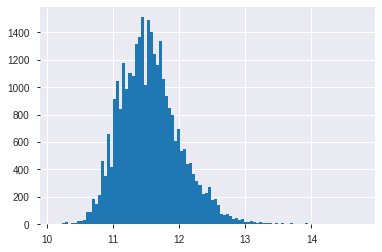

In [10]:
plt.hist(df['log_y'],bins=100)

(array([1.2900e+02, 3.5220e+03, 1.1443e+04, 1.0881e+04, 4.1620e+03,
        1.0720e+03, 1.8600e+02, 5.6000e+01, 1.3000e+01, 3.0000e+00]),
 array([14.60964047, 15.27402609, 15.93841171, 16.60279733, 17.26718295,
        17.93156857, 18.59595419, 19.26033981, 19.92472543, 20.58911105,
        21.25349666]),
 <a list of 10 Patch objects>)

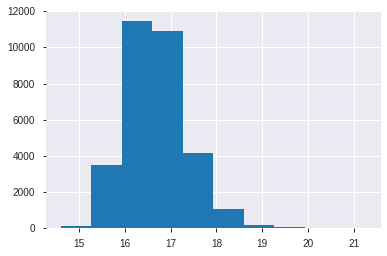

In [11]:
plt.hist(np.log(df['y'])/np.log(2))

(array([2.000e+00, 3.000e+00, 6.000e+00, 1.500e+01, 3.000e+00, 1.200e+01,
        9.000e+00, 2.200e+01, 2.300e+01, 3.400e+01, 8.900e+01, 8.700e+01,
        1.820e+02, 1.510e+02, 2.120e+02, 4.600e+02, 3.540e+02, 6.560e+02,
        4.180e+02, 9.130e+02, 1.046e+03, 8.440e+02, 1.174e+03, 9.840e+02,
        1.105e+03, 1.082e+03, 1.315e+03, 1.366e+03, 1.511e+03, 1.016e+03,
        1.491e+03, 1.403e+03, 1.241e+03, 1.159e+03, 1.341e+03, 1.058e+03,
        9.340e+02, 8.460e+02, 7.970e+02, 6.110e+02, 6.980e+02, 5.360e+02,
        5.490e+02, 4.380e+02, 4.450e+02, 3.640e+02, 3.180e+02, 2.890e+02,
        2.240e+02, 2.250e+02, 2.740e+02, 1.800e+02, 1.870e+02, 1.380e+02,
        7.800e+01, 6.900e+01, 7.200e+01, 6.100e+01, 4.000e+01, 4.900e+01,
        3.100e+01, 3.600e+01, 1.800e+01, 1.700e+01, 2.300e+01, 1.900e+01,
        1.100e+01, 1.500e+01, 7.000e+00, 9.000e+00, 1.100e+01, 4.000e+00,
        1.200e+01, 5.000e+00, 7.000e+00, 1.000e+00, 3.000e+00, 7.000e+00,
        5.000e+00, 1.000e+00, 0.000e+0

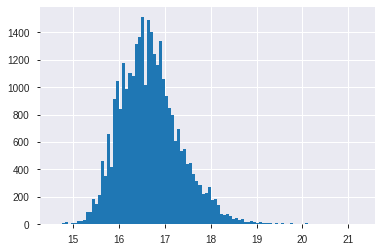

In [12]:
plt.hist(np.log2(df['y']),bins=100)

(array([8.500e+02, 6.358e+03, 7.850e+03, 6.237e+03, 3.796e+03, 2.175e+03,
        1.372e+03, 8.580e+02, 4.940e+02, 5.130e+02, 2.750e+02, 1.930e+02,
        8.900e+01, 8.500e+01, 6.400e+01, 5.000e+01, 2.800e+01, 2.200e+01,
        2.300e+01, 1.900e+01, 1.300e+01, 1.400e+01, 6.000e+00, 1.000e+01,
        4.000e+00, 8.000e+00, 6.000e+00, 9.000e+00, 4.000e+00, 2.000e+00,
        7.000e+00, 0.000e+00, 2.000e+00, 2.000e+00, 3.000e+00, 4.000e+00,
        1.000e+00, 4.000e+00, 1.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
        0.000e+00, 3.000e+00, 3.000e+00, 0.000e+00, 0.000e+00, 2.000e+00,
        0.000e+00, 0.000e+00, 0.000e+00, 3.000e+00, 0.000e+00, 0.000e+00,
        0.000e+00, 1.000e+00, 0.000e+00, 1.000e+00, 0.000e+00, 0.000e+00,
        0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
        1.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 1.000e+00,
        0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
        0.000e+00, 0.000e+00, 0.000e+0

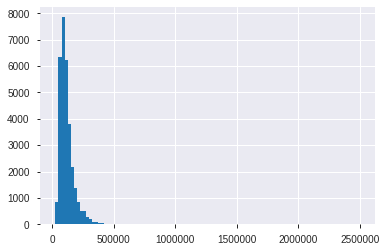

In [13]:
plt.hist(df['y'],bins=100)

(array([  41.,   89.,  506., 1029., 1959., 2146., 2458., 2229., 2648.,
        1989., 2396., 1757., 1654., 1480., 1227., 1035.,  780.,  748.,
         554.,  584.,  450.,  437.,  343.,  360.,  268.,  180.,  219.,
         167.,  169.,  138.,  192.,  129.,  135.,   77.,  122.,   69.,
          78.,   31.,   58.,   42.,   40.,   17.,   29.,   45.,   16.,
          14.,   18.,   27.,   23.,   10.]),
 array([ 25000.,  32460.,  39920.,  47380.,  54840.,  62300.,  69760.,
         77220.,  84680.,  92140.,  99600., 107060., 114520., 121980.,
        129440., 136900., 144360., 151820., 159280., 166740., 174200.,
        181660., 189120., 196580., 204040., 211500., 218960., 226420.,
        233880., 241340., 248800., 256260., 263720., 271180., 278640.,
        286100., 293560., 301020., 308480., 315940., 323400., 330860.,
        338320., 345780., 353240., 360700., 368160., 375620., 383080.,
        390540., 398000.]),
 <a list of 50 Patch objects>)

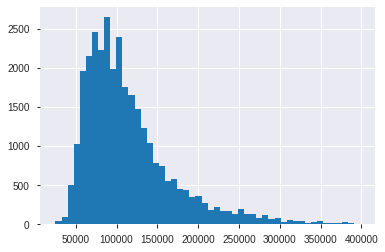

In [14]:
plt.hist(df[df['y']<400000]['y'],bins=50)

(array([   3.,    2.,   10.,   14.,   12.,    9.,   25.,   37.,  105.,
          88.,  185.,  255.,  421.,  488.,  666.,  843.,  990., 1075.,
        1175., 1319., 1126., 1576., 1582., 1643., 1446., 1932., 1591.,
        1356., 1462., 1364., 1244.,  881.,  890.,  744.,  709.,  570.,
         556.,  505.,  408.,  305.,  290.,  321.,  268.,  193.,  158.,
          97.,   91.,   81.,   41.,   60.]),
 array([10.1266311 , 10.18198263, 10.23733415, 10.29268567, 10.3480372 ,
        10.40338872, 10.45874025, 10.51409177, 10.56944329, 10.62479482,
        10.68014634, 10.73549786, 10.79084939, 10.84620091, 10.90155243,
        10.95690396, 11.01225548, 11.06760701, 11.12295853, 11.17831005,
        11.23366158, 11.2890131 , 11.34436462, 11.39971615, 11.45506767,
        11.51041919, 11.56577072, 11.62112224, 11.67647376, 11.73182529,
        11.78717681, 11.84252834, 11.89787986, 11.95323138, 12.00858291,
        12.06393443, 12.11928595, 12.17463748, 12.229989  , 12.28534052,
        12.34069

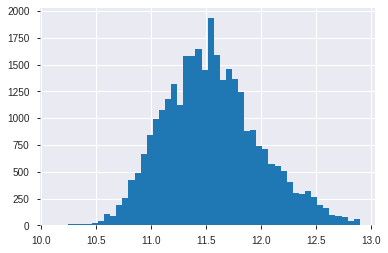

In [15]:
plt.hist(df[df['y']<400000]['log_y'],bins=50)

(array([6., 2., 4., 1., 0., 2., 0., 0., 0., 1.]),
 array([13.91082074, 13.99291879, 14.07501685, 14.1571149 , 14.23921296,
        14.32131101, 14.40340907, 14.48550712, 14.56760518, 14.64970323,
        14.73180129]),
 <a list of 10 Patch objects>)

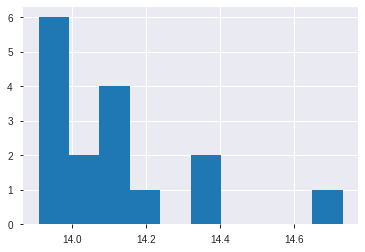

In [32]:
plt.hist(df[df['y']>1000000]['log_y'])

In [22]:
train = pd.read_csv('../processed_data/train_v10.csv')
test = pd.read_csv('../processed_data/test_v10.csv')

In [23]:
len(train[train['y']>200000])

2714

In [24]:
len(train['y'])

31467

In [25]:
for m in range(0,250):
    print('{0}-{1} : '.format(m*10000,(m+1)*10000),
          len(train[(m*10000 <= train['y'])&(train['y'] <= (m+1)*10000)]))

0-10000 :  0
10000-20000 :  0
20000-30000 :  26
30000-40000 :  175
40000-50000 :  926
50000-60000 :  2298
60000-70000 :  3449
70000-80000 :  3498
80000-90000 :  3693
90000-100000 :  3304
100000-110000 :  3308
110000-120000 :  2719
120000-130000 :  2272
130000-140000 :  1893
140000-150000 :  1287
150000-160000 :  1151
160000-170000 :  932
170000-180000 :  778
180000-190000 :  687
190000-200000 :  557
200000-210000 :  466
210000-220000 :  401
220000-230000 :  322
230000-240000 :  274
240000-250000 :  292
250000-260000 :  265
260000-270000 :  228
270000-280000 :  202
280000-290000 :  163
290000-300000 :  124
300000-310000 :  99
310000-320000 :  95
320000-330000 :  70
330000-340000 :  61
340000-350000 :  73
350000-360000 :  53
360000-370000 :  29
370000-380000 :  41
380000-390000 :  40
390000-400000 :  30
400000-410000 :  27
410000-420000 :  24
420000-430000 :  28
430000-440000 :  21
440000-450000 :  10
450000-460000 :  16
460000-470000 :  11
470000-480000 :  14
480000-490000 :  20
490000-

In [91]:
train[train['y']>2000000].iloc[:,:15]

,id,y,location,access,layout,age,direction,area,floor,bath_toilet,kitchen,broadcast_com,facilities,parking,enviroment
5093,5094,2500000,東京都港区三田２丁目4-3,南北線\t麻布十番駅\t徒歩8分\t\t都営大江戸線\t赤羽橋駅\t徒歩9分\t\t山手線\...,2LDK+S(納戸),1年8ヶ月,西,217.29m2,9,専用バス／\t専用トイレ／\tバス・トイレ別／\tシャワー／\t追焚機能／\t浴室乾燥機\t...,IHコンロ\t／\tコンロ3口／\tシステムキッチン\t／\tカウンターキッチン\t／\tL...,インターネット対応,エアコン付／\t床暖房\tウォークインクローゼット\tシューズボックス／\tバルコニー／\t...,"駐車場\t空有(43台)\t48,600円",【飲食店】 959m\t【飲食店】 611m\t【スーパー】 417m\t【スーパー】 65...


In [95]:
s = 0
for m in range(0,250):
    s += 100*len(train[(m*10000 <= train['y'])&(train['y'] < (m+1)*10000)])/len(train)
    print('{0}-{1} : '.format(m*10000,(m+1)*10000),s)

0-10000 :  0.0
10000-20000 :  0.0
20000-30000 :  0.04766898655734579
30000-40000 :  0.4131312168303302
40000-50000 :  2.701242571582928
50000-60000 :  8.701179012934185
60000-70000 :  18.34302602726666
70000-80000 :  28.118346203959703
80000-90000 :  38.41166936790924
90000-100000 :  47.989957733498585
100000-110000 :  57.26316458512092
110000-120000 :  64.80439825849302
120000-130000 :  71.19204245717737
130000-140000 :  76.48012203260559
140000-150000 :  80.02987256490928
150000-160000 :  83.18555947500558
160000-170000 :  85.67070264086188
170000-180000 :  87.72046906282775
180000-190000 :  89.60498299806149
190000-200000 :  91.13992436520802
200000-210000 :  92.3507166237646
210000-220000 :  93.32951981440877
220000-230000 :  94.13353672100934
230000-240000 :  94.84539358693236
240000-250000 :  95.53182699335814
250000-260000 :  96.17376934566373
260000-270000 :  96.72672958972893
270000-280000 :  97.18752979311661
280000-290000 :  97.61337273969556
290000-300000 :  97.893030794165

In [26]:
train.loc[:,['y','']]

,y,prob
0,75000,NaN
1,76000,NaN
2,110000,NaN
3,150000,NaN
4,74000,NaN
...,...,...
31462,80000,NaN
31463,54500,NaN
31464,125000,NaN
31465,98000,NaN


In [34]:
test[test['prob']>0]

,id,location,access,layout,age,direction,area,floor,bath_toilet,kitchen,...,area_num_countall,age_countall,floor_countall,max_floor_countall,layout_countall,direction_countall,facilities_countall,contract_period_countall,prob,label
0,31471,東京都世田谷区深沢５丁目1-27,東急大井町線\t等々力駅\t徒歩15分\t\t東急田園都市線\t桜新町駅\t徒歩24分\t\...,2LDK,49年0ヶ月,南,50.22m2,8,専用バス／\t専用トイレ／\tバス・トイレ別／\tシャワー／\t追焚機能／\t温水洗浄便座／...,ガスコンロ／\tコンロ3口／\tシステムキッチン\t／\t給湯／\tL字キッチン,...,17,20,1793,2705,5130,17695,21,1,0.000762,0
6,31477,東京都港区芝１丁目,山手線\t浜松町駅\t徒歩10分\t\t山手線\t田町(東京都)駅\t徒歩10分\t\t都営...,1K,17年8ヶ月,NaN,19.98m2,3,専用バス／\t専用トイレ／\tバス・トイレ別／\tシャワー／\t温水洗浄便座,ガスコンロ／\tコンロ1口／\t給湯,...,33,50,10410,2705,23661,5557,1609,1,0.000211,0
17,31488,東京都渋谷区広尾４丁目,日比谷線\t広尾駅\t徒歩5分,3LDK,34年7ヶ月,南東,112.96m2,7,専用バス／\t専用トイレ／\tバス・トイレ別／\tシャワー／\t温水洗浄便座／\t洗面台独立,ガスコンロ／\tシステムキッチン,...,2,108,2238,2479,2240,6150,4,1,0.825240,1
20,31491,東京都港区三田４丁目7-26,南北線\t白金高輪駅\t徒歩3分\t\t都営三田線\t白金高輪駅\t徒歩3分,1K,4年2ヶ月,南,25.09m2,6,バス・トイレ別／\tシャワー／\t温水洗浄便座,ガスコンロ／\t給湯,...,55,117,2793,2631,23661,17695,37,1,0.012955,0
24,31495,東京都練馬区春日町５丁目,都営大江戸線\t練馬春日町駅\t徒歩9分\t\t西武豊島線\t豊島園(西武線)駅\t徒歩14...,3LDK,32年3ヶ月,南,69.02m2,1,専用バス／\t専用トイレ／\tバス・トイレ別／\tシャワー／\t洗面台独立／\t脱衣所,ガスコンロ／\t給湯／\t独立キッチン,...,2,68,12112,6165,2240,17695,1,1,0.002238,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
31246,62717,東京都板橋区板橋２丁目17-9,都営三田線\t板橋区役所前駅\t徒歩7分\t\t埼京線\t板橋駅\t徒歩12分\t\t東武東...,2LDK,13年5ヶ月,南,58.09m2,6,バス・トイレ別／\tシャワー／\t追焚機能／\t浴室乾燥機\t／\t温水洗浄便座／\t洗面台...,ガスコンロ／\tコンロ3口／\tシステムキッチン\t／\tカウンターキッチン\t／\t給湯,...,2,411,2793,2705,5130,17695,3,1,0.000289,0
31256,62727,東京都大田区田園調布１丁目,東急東横線\t多摩川駅\t徒歩10分\t\t東急池上線\t雪が谷大塚駅\t徒歩9分\t\t東...,2LDK,7年5ヶ月,南,66.37m2,2,専用バス／\t専用トイレ／\tバス・トイレ別／\t追焚機能／\t浴室乾燥機\t／\t温水洗浄...,IHコンロ\t／\tシステムキッチン,...,7,183,17201,12311,5130,17695,3,1,0.000442,0
31258,62729,東京都千代田区岩本町２丁目,都営新宿線\t岩本町駅\t徒歩2分\t\t山手線\t秋葉原駅\t徒歩4分\t\t日比谷線\t...,1R,15年6ヶ月,南,22.71m2,8,専用バス／\t専用トイレ／\tシャワー／\t浴室乾燥機,ガスコンロ／\tコンロ2口／\tシステムキッチン\t／\t独立キッチン,...,19,299,1793,1273,10177,17695,1211,1,0.000061,0
31260,62731,東京都千代田区二番町,有楽町線\t麹町駅\t徒歩3分\t\t丸ノ内線(池袋－荻窪)\t四ツ谷駅\t徒歩4分\t\t...,1K,15年4ヶ月,北,55.2m2,14,専用バス／\t専用トイレ／\tバス・トイレ別／\tシャワー／\t追焚機能／\t浴室乾燥機\t...,IHコンロ\t／\tコンロ3口／\tシステムキッチン\t／\t独立キッチン,...,8,116,295,2479,23661,3767,1,1,0.017630,0
